In [1]:
import tensorflow as tf


In [2]:
import matplotlib.pyplot as plt

In [3]:
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.optimizers import RMSprop

In [5]:
img = image.load_img(r"E:\OneDrive\Desktop\dataset\train\bike\1.jpg")

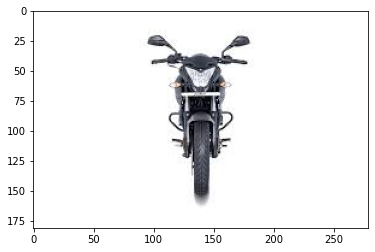

In [6]:
plt.imshow(img)

In [7]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset = train.flow_from_directory(r"E:\OneDrive\Desktop\dataset\train",target_size=(200,200),batch_size=3,class_mode='binary')

Found 66 images belonging to 2 classes.


In [9]:
test_dataset = test.flow_from_directory(r"E:\OneDrive\Desktop\dataset\test",target_size=(200,200),batch_size=3,class_mode='binary')

Found 34 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'bike': 0, 'cars': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


In [13]:
history = model.fit(
      train_dataset,
      steps_per_epoch=10,  
      epochs=15,
      validation_data = test_dataset, validation_steps = 15)

Epoch 1/15
10/10 [==============================] - 1s 138ms/step - loss: 5.0568 - accuracy: 0.5333 - val_loss: 0.6088 - val_accuracy: 0.5814
Epoch 2/15
10/10 [==============================] - 1s 81ms/step - loss: 0.7363 - accuracy: 0.6000 - val_loss: 0.4640 - val_accuracy: 0.7442
Epoch 3/15
10/10 [==============================] - 1s 75ms/step - loss: 0.6250 - accuracy: 0.7667 - val_loss: 0.4244 - val_accuracy: 0.9535
Epoch 4/15
10/10 [==============================] - 1s 75ms/step - loss: 0.3479 - accuracy: 0.9000 - val_loss: 0.2036 - val_accuracy: 0.9302
Epoch 5/15
10/10 [==============================] - 1s 76ms/step - loss: 0.2024 - accuracy: 0.8667 - val_loss: 0.1889 - val_accuracy: 0.9070
Epoch 6/15
10/10 [==============================] - 1s 89ms/step - loss: 0.1692 - accuracy: 0.9333 - val_loss: 0.9416 - val_accuracy: 0.6279
Epoch 7/15
10/10 [==============================] - 1s 94ms/step - loss: 0.3314 - accuracy: 0.8000 - val_loss: 0.1467 - val_accuracy: 0.9302
Epoch 8/15
1

In [14]:
dir_path =r"E:\OneDrive\Desktop\dataset\test"
import numpy as np

In [34]:
img1 = image.load_img(r'E:\OneDrive\Desktop\dataset\test\cars\48.jpg', target_size=(200, 200))
img = image.img_to_array(img1)
img = img/255

In [35]:
img = np.expand_dims(img, axis=0)

In [36]:
prediction = model.predict(img, batch_size=None,steps=1) 
prediction

array([[0.9998729]], dtype=float32)

In [37]:
if prediction[0] >0.7:
    print("it is a car")
else:
    print("it is a bike")
    

it is acar


[INFO] saving mask detector model...


In [1]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13633 sha256=e7d72ac33ea1e4a8fed80d5f3b961827187731667c0cdaab8371cb2e57f0a647
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\61\1a\34\93d256a3b4c6b1d2c08cc2b17b1502af8c5b320eac5eaec1f6
Successfully built pytesseract


In [ ]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
a = cv2.imread(r"C:\Users\PARTH\Downloads\lic1.jpg")
img = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
print("hi")



r = cv2.selectROI(img,False)
imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
cv2.imshow("roi",imCrop)
hi,wi,_ = imCrop.shape

print(pytesseract.image_to_string(imCrop))
boxes = pytesseract.image_to_boxes(imCrop)

for b in boxes.splitlines():

    b=b.split(' ')
    print(b)
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(imCrop,(x,hi-y),(w,hi-h),(0,255,0),1)


cv2.imshow("result",imCrop)
cv2.waitKey(0)

hi
